# The Logic behind MNL model

In [1]:
import numpy as np
import math
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt

In discrete choice theory, the utility of alternative $l$ is:

$$
U_l = V_l + \varepsilon_l
$$

where $V_1$ is the deterministic component and $\varepsilon_l$ is a random error.

The Logit model assumes $\varepsilon_l\sim Gumbel(0,\theta)$. According to the translation property of Gumbel distribution, we have $U_l\sim Gumbel(V_l,\theta)$.

Here, we consider 3 alternatives to show the property of the MNL model.\
Alternative 1: $U_1\sim Gumbel (1.5, 1)$\
Alternative 2: $U_2\sim Gumbel (2, 1)$\
Alternative 3: $U_3\sim Gumbel (3, 1)$

In [2]:
# Define the Gumbel variables with same scale
U_scale = 1

U1_mode = 1.5
U2_mode = 2
U3_mode = 3

U1 = gumbel_r(loc=U1_mode, scale=U_scale)
U2 = gumbel_r(loc=U2_mode, scale=U_scale)
U3 = gumbel_r(loc=U3_mode, scale=U_scale)

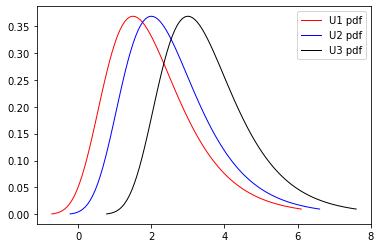

In [3]:
# PDF of U1, U2, and U3
fig, ax = plt.subplots(1, 1)
x = np.linspace(U1.ppf(0.0001), U1.ppf(0.99), 100)
ax.plot(x, U1.pdf(x), 'r-', lw=1, alpha=1, label='U1 pdf')

x = np.linspace(U2.ppf(0.0001), U2.ppf(0.99), 100)
ax.plot(x, U2.pdf(x), 'b-', lw=1, alpha=1, label='U2 pdf')

x = np.linspace(U3.ppf(0.0001), U3.ppf(0.99), 100)
ax.plot(x, U3.pdf(x), 'k-', lw=1, alpha=1, label='U3 pdf')

plt.legend()

Property: If $\varepsilon_1, \varepsilon_2,..., \varepsilon_N$ are Gumbel $(\eta_1,\mu),(\eta_2,\mu),...(\eta_N,\mu)$, then $\max_l{\varepsilon_l}$ is Gumbel with

$$
\max_l{\varepsilon_l}\sim Gumbel(\frac{1}{\mu}\ln\sum_l{e^{\mu\eta_l}}, \mu)
$$

Using this property, we can derive:
$$
\max\{U_1, U_2\} \sim Gumbel(\frac{1}{\mu}\ln(e^{\mu\eta_1} + e^{\mu\eta_2}), \mu)
$$

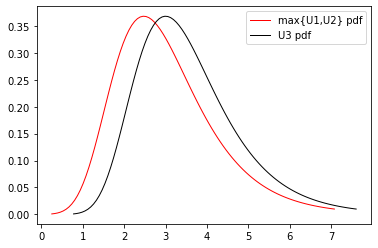

In [4]:
# PDF of max_u1_U2 and U3
mode_U1_U2 = (1 / U_scale) * math.log( math.e ** (U_scale * U1_mode) + math.e ** (U_scale * U2_mode) )
max_U1_U2 = gumbel_r(loc=mode_U1_U2, scale=U_scale)

fig, ax = plt.subplots(1, 1)
x = np.linspace(max_U1_U2.ppf(0.0001), max_U1_U2.ppf(0.99), 100)
ax.plot(x, max_U1_U2.pdf(x), 'r-', lw=1, alpha=1, label='max{U1,U2} pdf')

x = np.linspace(U3.ppf(0.0001), U3.ppf(0.99), 100)
ax.plot(x, U3.pdf(x), 'k-', lw=1, alpha=1, label='U3 pdf')

plt.legend()

Property: If $\varepsilon_1$ and $\varepsilon_2$ are (independent) Gumbel $(\eta_1,\mu)$ and $(\eta_2,\mu)$, then $\varepsilon*=\varepsilon_2-\varepsilon_1$ follows a Logistic distribution $L(\eta_2-\eta_1, \mu)$ with CDF:

$$
F(x)=\frac{1}{1+e^{\mu(\eta_2-\eta_1-x)}}
$$

Caution: in different materials, the definition of scale may be different: some use $\mu$ while others use $\frac{1}{\mu}$.

Now, let's consider the difference between max{U1,U2} and U3:

$$
U3-max\{U1,U2\}\sim Logistic(\eta_3 - \frac{1}{\mu}\ln(e^{\mu\eta_1} + e^{\mu\eta_2}), \mu)
$$

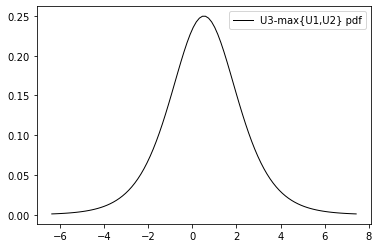

In [5]:
# PDF of the Logistic distribution
from scipy.stats import logistic

difference = logistic(loc = U3_mode - mode_U1_U2, scale = 1 / U_scale)

fig, ax = plt.subplots(1, 1)
x = np.linspace(difference.ppf(0.001), difference.ppf(0.999), 100)
ax.plot(x, difference.pdf(x), 'k-', lw=1, alpha=1, label='U3-max{U1,U2} pdf')

plt.legend()

Probability of choosing alternative 3 is 0.6285317192117625


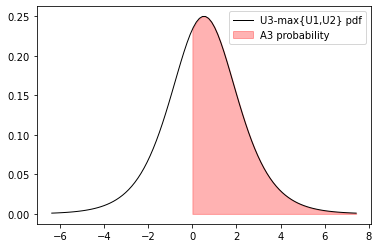

In [6]:
# Probability of choosing alternative 3

fig, ax = plt.subplots(1, 1)
x = np.linspace(difference.ppf(0.001), difference.ppf(0.999), 100)
ax.plot(x, difference.pdf(x), 'k-', lw=1, alpha=1, label='U3-max{U1,U2} pdf')

x_positive = np.linspace(0.0, difference.ppf(0.999), 100)
ax.fill_between(x_positive, difference.pdf(x_positive), color='r',alpha=0.3, label='A3 probability')

plt.legend()

prob_A3 = 1 - difference.cdf(0)
print('Probability of choosing alternative 3 is', prob_A3)

The probability of choosing Alternative 3 = prob(difference > 0) = 1 - prob(difference <= 0) = 1 - difference CDF(0)

How about directly appling Logit model?

$$
P_k = \frac{e^{\theta V_k}}{\sum_l{e^{\theta V_l}}}
$$

In this example, $\theta = \mu = 1$.

In [7]:
theta = 1
print('Logit model probability')
print(math.e ** (theta * U3_mode) / (math.e ** (theta * U1_mode) + math.e ** (theta * U2_mode) +  math.e ** (theta * U3_mode)))

Logit model probability
0.6285317192117624


They are the same!